## Data import

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Train Test Split

In [15]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Scaling Data

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = MinMaxScaler()
scaler_std = StandardScaler()

In [22]:
scaler.fit(X_train)
scaler_std.fit(X_train)

StandardScaler()

In [23]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model
             
    

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [26]:
X_train.shape

(426, 30)

In [27]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [28]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6741 - val_loss: 0.6556
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6449 - val_loss: 0.6245
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6076 - val_loss: 0.5843
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5603 - val_loss: 0.5308
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5116 - val_loss: 0.4712
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4672 - val_loss: 0.4087
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3978 - val_loss: 0.3565
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3327 - val_loss: 0.3104
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3088 - val_loss: 0.2797
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2745 - val_loss: 0.2491
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0591 - val_loss: 0.1141
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0471 - val_loss: 0.1173
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0478 - val_loss: 0.1136
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0467 - val_loss: 0.1263
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.1155
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0471 - val_loss: 0.1227
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0565 - val_loss: 0.1155
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0597 - val_loss: 0.1213
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0363 - val_loss: 0.1171
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.1228
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.1412
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1422
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1389
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.1365
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.1425
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.1405
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.1366
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.1402
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1420
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.1367
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0216 - val_loss: 0.1466
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.1450
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0209 - val_loss: 0.1553
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.1519
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.1480
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1476
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.1579
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.1550
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0180 - val_loss: 0.1589
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.1639
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.1699
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.2032
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.1574
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.1966
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.1550
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.2106
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.1534
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.2031
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.1533
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.1918
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.2277
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.2290
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.1876
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.2216
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.2095
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.2070
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.1968
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.2144
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.1947
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.2210
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.2280
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.2362
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.2436
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.2346
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.2398
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.2322
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.2376
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.2372
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.2366
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.2428
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.2852
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.2960
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.2824
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.2900
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.2879
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.2889
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.2905
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.2866
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.2931
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.2778
Epoc

In [33]:
# model.history.history

{'loss': [0.6671862006187439,
  0.6358804702758789,
  0.6008090376853943,
  0.555564820766449,
  0.5020275712013245,
  0.4416225254535675,
  0.38660505414009094,
  0.34175804257392883,
  0.30675002932548523,
  0.2788747251033783,
  0.25345027446746826,
  0.233786478638649,
  0.2187846153974533,
  0.2062046378850937,
  0.19280290603637695,
  0.18329378962516785,
  0.17890936136245728,
  0.1688135862350464,
  0.16004444658756256,
  0.15011298656463623,
  0.14433372020721436,
  0.13483387231826782,
  0.1313442587852478,
  0.12554848194122314,
  0.11928161978721619,
  0.11477465182542801,
  0.11206276714801788,
  0.10710958391427994,
  0.10448254644870758,
  0.09938198328018188,
  0.09726540744304657,
  0.09346865117549896,
  0.08908681571483612,
  0.08684930950403214,
  0.08466547727584839,
  0.08243473619222641,
  0.08059471100568771,
  0.07853446155786514,
  0.07813920080661774,
  0.07512266933917999,
  0.07334496825933456,
  0.07244572043418884,
  0.07119132578372955,
  0.0713339969515

In [31]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
# model_loss

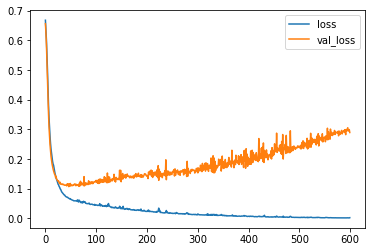

In [32]:
model_loss.plot()

## Example Two: Early Stopping

In [34]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [37]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 2s 49ms/step - loss: 0.6961 - val_loss: 0.6706
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6646 - val_loss: 0.6440
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6381 - val_loss: 0.6132
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6016 - val_loss: 0.5716
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5637 - val_loss: 0.5234
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5150 - val_loss: 0.4713
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4469 - val_loss: 0.4195
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4033 - val_loss: 0.3683
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3641 - val_loss: 0.3259
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3354 - val_loss: 0.2883
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.1068
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0467 - val_loss: 0.1108
Epoch 85/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0418 - val_loss: 0.1057
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0387 - val_loss: 0.1044
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0362 - val_loss: 0.1129
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0372 - val_loss: 0.1078
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0503 - val_loss: 0.1106
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0486 - val_loss: 0.1033
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0416 - val_loss: 0.1093
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0468 - val_loss: 0.1140


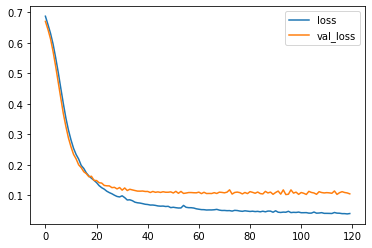

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [39]:
from tensorflow.keras.layers import Dropout

In [40]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 3s 180ms/step - loss: 0.7158 - val_loss: 0.6578
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6557 - val_loss: 0.6294
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6726 - val_loss: 0.6020
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6206 - val_loss: 0.5777
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6300 - val_loss: 0.5533
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5950 - val_loss: 0.5279
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5555 - val_loss: 0.4995
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.4729
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5151 - val_loss: 0.4538
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5316 - val_loss: 0.4330
Epoch 1

14/14 [==============================] - 0s 8ms/step - loss: 0.1505 - val_loss: 0.1083
Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1050 - val_loss: 0.1076
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1078 - val_loss: 0.1135
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1345 - val_loss: 0.1063
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1365 - val_loss: 0.1053
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1066 - val_loss: 0.1057
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1256 - val_loss: 0.1021
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1266 - val_loss: 0.1098
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1134 - val_loss: 0.1153
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1093 - val_loss: 0.1077
Epoch 92/600


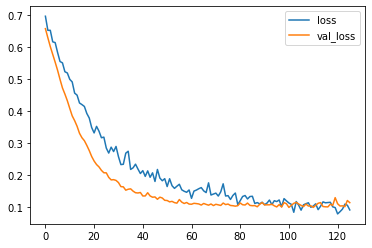

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [43]:
predictions = model.predict_classes(X_test)

C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [46]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]
